In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl

In [4]:
df = pd.read_excel('Book1.xlsx', engine='openpyxl')
df.head()

,Name,Age,Gender,Contact,Name of School,Current Grade Level,Region of School,Do you have access to a device for online Learning?,"If yes, what type of device do you use?",How comfortable are you with using digital devices for Learning?,...,What is your preferred learning style?,Have you used an online learning platform before?,"If yes, please specify",What is your level of experience with online/remote learning platforms?,What are the main challenges you have faced (or expect to face) with online learning?,"If others, please specify",What kind of support would you find most helpful in transitioning to technology-enabled learning?,Have you heard about the TeOSS project before?,"If yes, what do you know about the TeOSS project?",What are your expectations for the TeOSS Learners Training Program?
0,Emmanuellla Tofah,45,Female,0246268839,"No.1 Basic School, Akatsi",JHS 1,Volta,Yes,Laptop,Moderate,...,"Visual (videos, diagrams)",No,NaN,Some experience,Lack of access to reliable internet/devices,NaN,Training on how to use online learning platforms,No,NaN,It will enable me use online learning platform...
1,Roselyn Lartey,14,Female,NaN,Enchi Roman Catholic Basic School,JHS 3,Western,Yes,Smartphone,Comfortable,...,"Auditory (lectures, discussions)",No,NaN,No experience,Difficulty staying engaged and motivated,NaN,Training on how to use online learning platforms,No,NaN,To help learning through digital means
2,Grace Quainoo,14,Female,0245759767,Enchi Roman Catholic Basic School,JHS 2,Western,No,NaN,Moderate,...,"Visual (videos, diagrams)",No,NaN,No experience,Balancing schoolwork with other responsibilities,NaN,Training on how to use online learning platforms,No,NaN,To acquire knowledge about ICT
3,Beatrice Attramah,14,Female,0548509101,Roman Catholic,JHS 3,Western,Yes,Smartphone,Very Comfortable,...,"Visual (videos, diagrams)",No,NaN,No experience,Lack of access to reliable internet/devices,NaN,Training on how to use online learning platforms,No,NaN,More online learning experience
4,Benedicta Mensah,14,Female,NaN,Enchi Roman Catholic,JHS 2,Western,No,NaN,Moderate,...,"Visual (videos, diagrams)",No,NaN,No experience,Balancing schoolwork with other responsibilities,NaN,Opportunities for virtual peer collaboration a...,No,NaN,To acquire knowledge about ICT


In [7]:
df.shape

(663, 24)

In [8]:
df.dtypes

Name                                                                                                 object
Age                                                                                                  object
Gender                                                                                               object
Contact                                                                                              object
Name of School                                                                                       object
Current Grade Level                                                                                  object
Region of School                                                                                     object
Do you have access to a device for online Learning?                                                  object
If yes, what type of device do you use?                                                              object
How comfortable are you with

In [9]:
df.describe()

,Name,Age,Gender,Contact,Name of School,Current Grade Level,Region of School,Do you have access to a device for online Learning?,"If yes, what type of device do you use?",How comfortable are you with using digital devices for Learning?,...,What is your preferred learning style?,Have you used an online learning platform before?,"If yes, please specify",What is your level of experience with online/remote learning platforms?,What are the main challenges you have faced (or expect to face) with online learning?,"If others, please specify",What kind of support would you find most helpful in transitioning to technology-enabled learning?,Have you heard about the TeOSS project before?,"If yes, what do you know about the TeOSS project?",What are your expectations for the TeOSS Learners Training Program?
count,663,663,663,466,663,663,663,663,531,663,...,663,663,179,663,663,12,663,663,151,663
unique,625,25,2,427,170,9,8,2,4,4,...,3,2,100,3,6,11,6,2,114,452
top,Joseph Walter Eduam Donkor,14,Male,0204818822,Elmina Methodist JHS,JHS 3,Central,Yes,Smartphone,Very Comfortable,...,"Visual (videos, diagrams)",No,Google,Some experience,Lack of access to reliable internet/devices,Not really,Training on how to use online learning platforms,No,Providing learning technology,Learn
freq,3,148,359,5,109,197,278,535,390,279,...,397,434,33,348,401,2,522,508,8,37


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 24 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Name                                                                                               663 non-null    object
 1   Age                                                                                                663 non-null    object
 2   Gender                                                                                             663 non-null    object
 3   Contact                                                                                            466 non-null    object
 4   Name of School                                                                                     663 non-null    object
 5   C

In [11]:
df = df[pd.to_numeric(df['Age'], errors='coerce').notnull()]

In [12]:
df["Age"] = df["Age"].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656 entries, 0 to 662
Data columns (total 24 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Name                                                                                               656 non-null    object
 1   Age                                                                                                656 non-null    int64 
 2   Gender                                                                                             656 non-null    object
 3   Contact                                                                                            461 non-null    object
 4   Name of School                                                                                     656 non-null    object
 5   Curren

In [22]:
df.isna().sum()

Name                                                                                                   0
Age                                                                                                    0
Gender                                                                                                 0
Contact                                                                                              195
Name of School                                                                                         0
Current Grade Level                                                                                    0
Region of School                                                                                       0
Do you have access to a device for online Learning?                                                    0
If yes, what type of device do you use?                                                              131
How comfortable are you with using digital devices for 

In [23]:
df.duplicated().sum()

np.int64(1)

In [26]:
df["Age"].value_counts()

Age
14    148
13    138
12     93
11     70
15     66
10     33
9      27
8      25
16     24
17     10
18      5
7       5
19      3
6       3
20      2
21      2
45      1
26      1
Name: count, dtype: int64

In [27]:
age_counts = df["Age"].value_counts()

In [28]:
# Print the gender counts
print("Age Distribution:")
print(age_counts)

Age Distribution:
Age
14    148
13    138
12     93
11     70
15     66
10     33
9      27
8      25
16     24
17     10
18      5
7       5
19      3
6       3
20      2
21      2
45      1
26      1
Name: count, dtype: int64


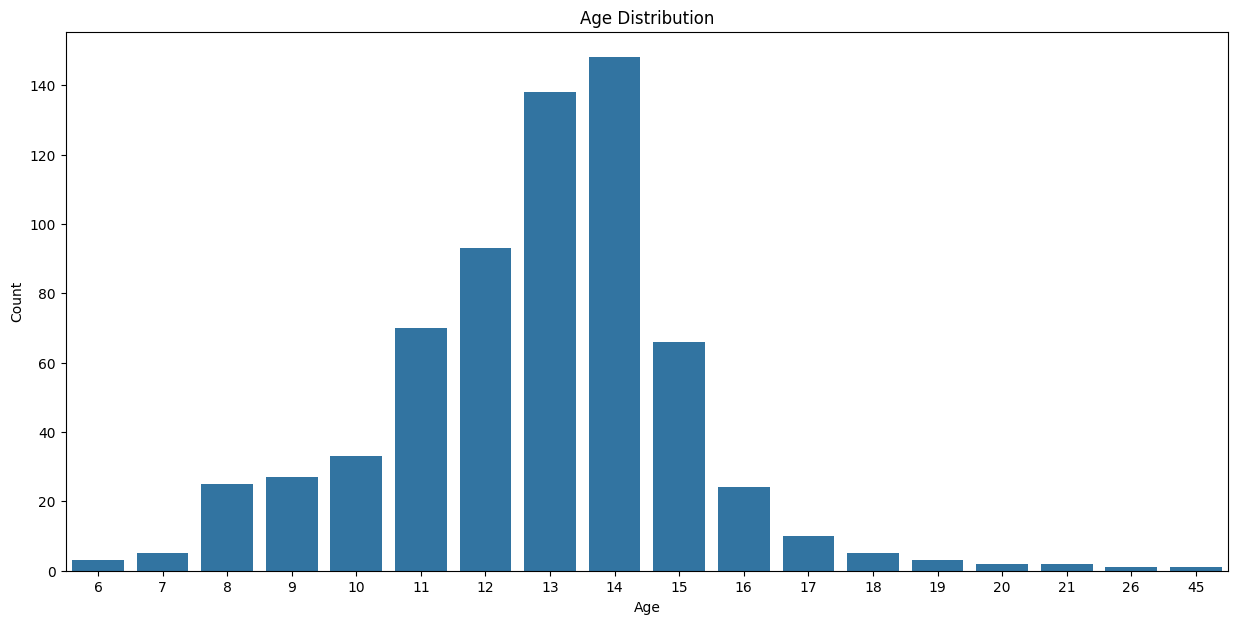

In [29]:
plt.figure(figsize = (15,7))
sns.barplot(data = age_counts)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.savefig("age.png")
plt.show()

In [30]:
df["Gender"].value_counts()

Gender
Male      357
Female    299
Name: count, dtype: int64

In [34]:
gender_counts = df["Gender"].value_counts()

Gender Distribution:
Gender
Male      357
Female    299
Name: count, dtype: int64


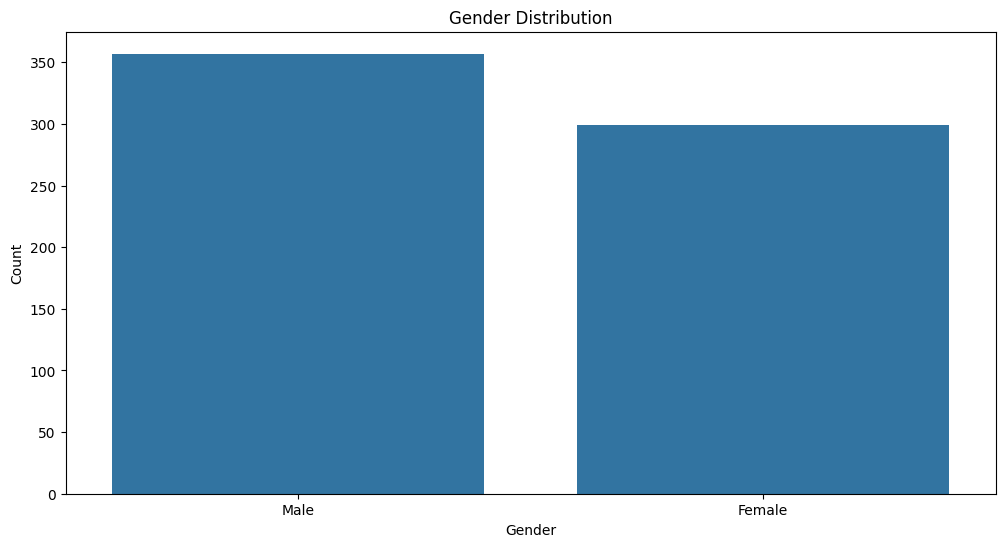

In [40]:
# Print the gender counts
print("Gender Distribution:")
print(gender_counts)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data = gender_counts)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.savefig("gender")
plt.show()

In [59]:
region_counts = df["Region of School"].value_counts()
region_counts

Region of School
Central        273
Western        212
Eastern         46
Volta           43
Northern        36
Upper West      17
Brong Ahafo     16
Upper East      13
Name: count, dtype: int64

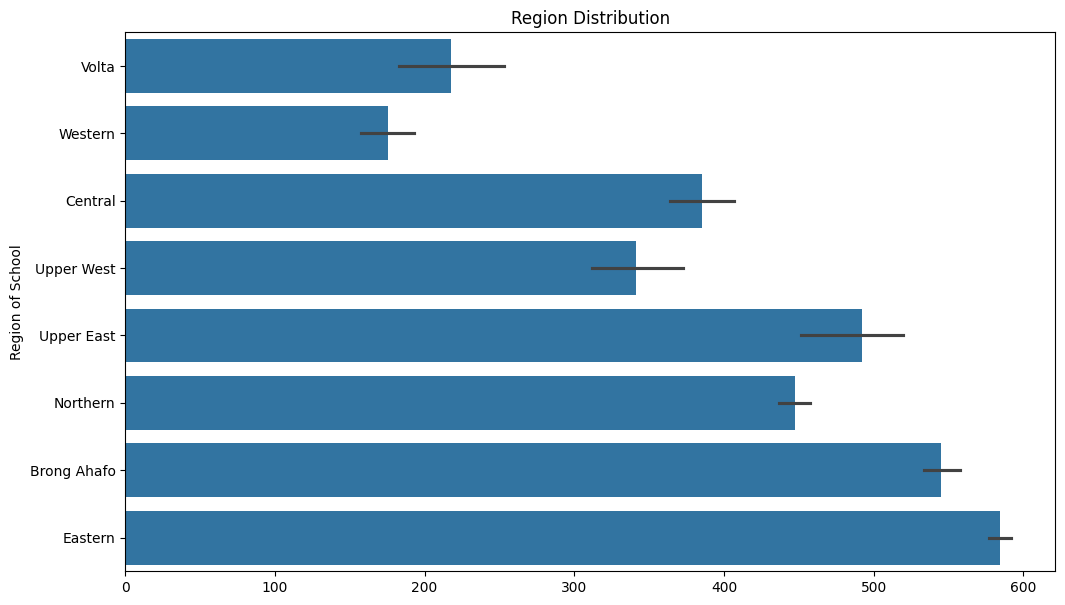

In [43]:
plt.figure(figsize = (12,7))
sns.barplot(data = region_counts)
plt.title("Region Distribution")
plt.savefig('region_dis.png')
plt.show()

In [44]:
device_use_online = df["If yes, what type of device do you use?"]

In [60]:
device_use_online.value_counts()

If yes, what type of device do you use?
Smartphone          386
Tablet              108
Laptop               25
Desktop Computer      6
Name: count, dtype: int64

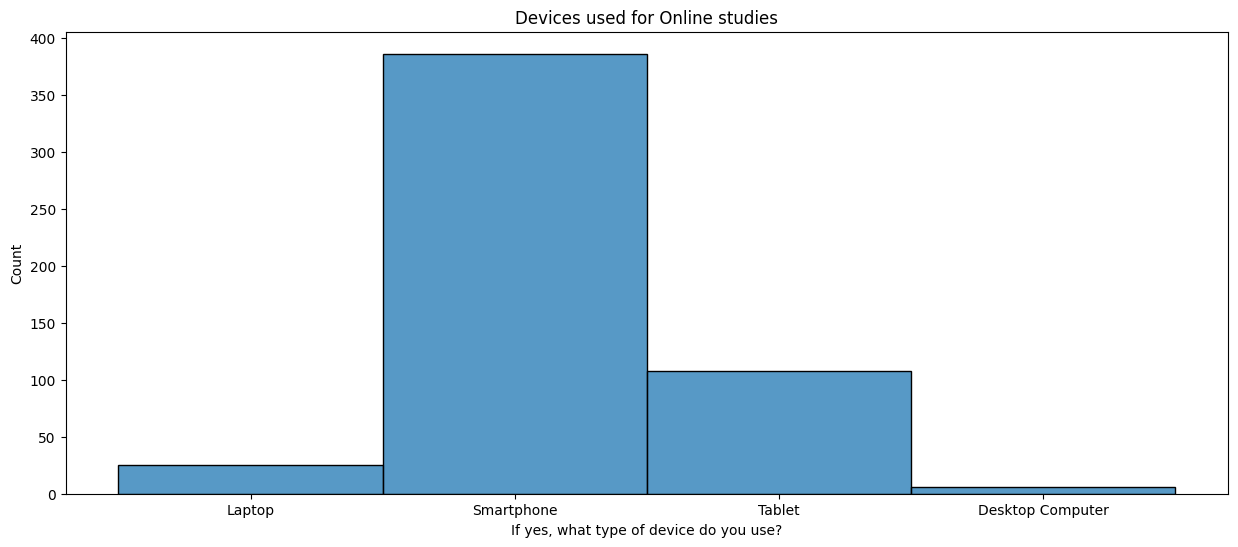

In [52]:
plt.figure(figsize = (15,6))
sns.histplot(data = device_use_online)
plt.title("Devices used for Online studies")
plt.savefig("devices_used.png")
plt.show()

In [46]:
support_needs = df["What kind of support would you find most helpful in transitioning to technology-enabled learning?"].value_counts()
print(support_needs)

What kind of support would you find most helpful in transitioning to technology-enabled learning?
Training on how to use online learning platforms                       516
Opportunities for virtual peer collaboration and social interaction     63
Tips for staying engaged and motivated in remote settings               28
Guidance on time management and balancing responsibilities              25
Access to technical support and troubleshooting                         20
Others                                                                   4
Name: count, dtype: int64


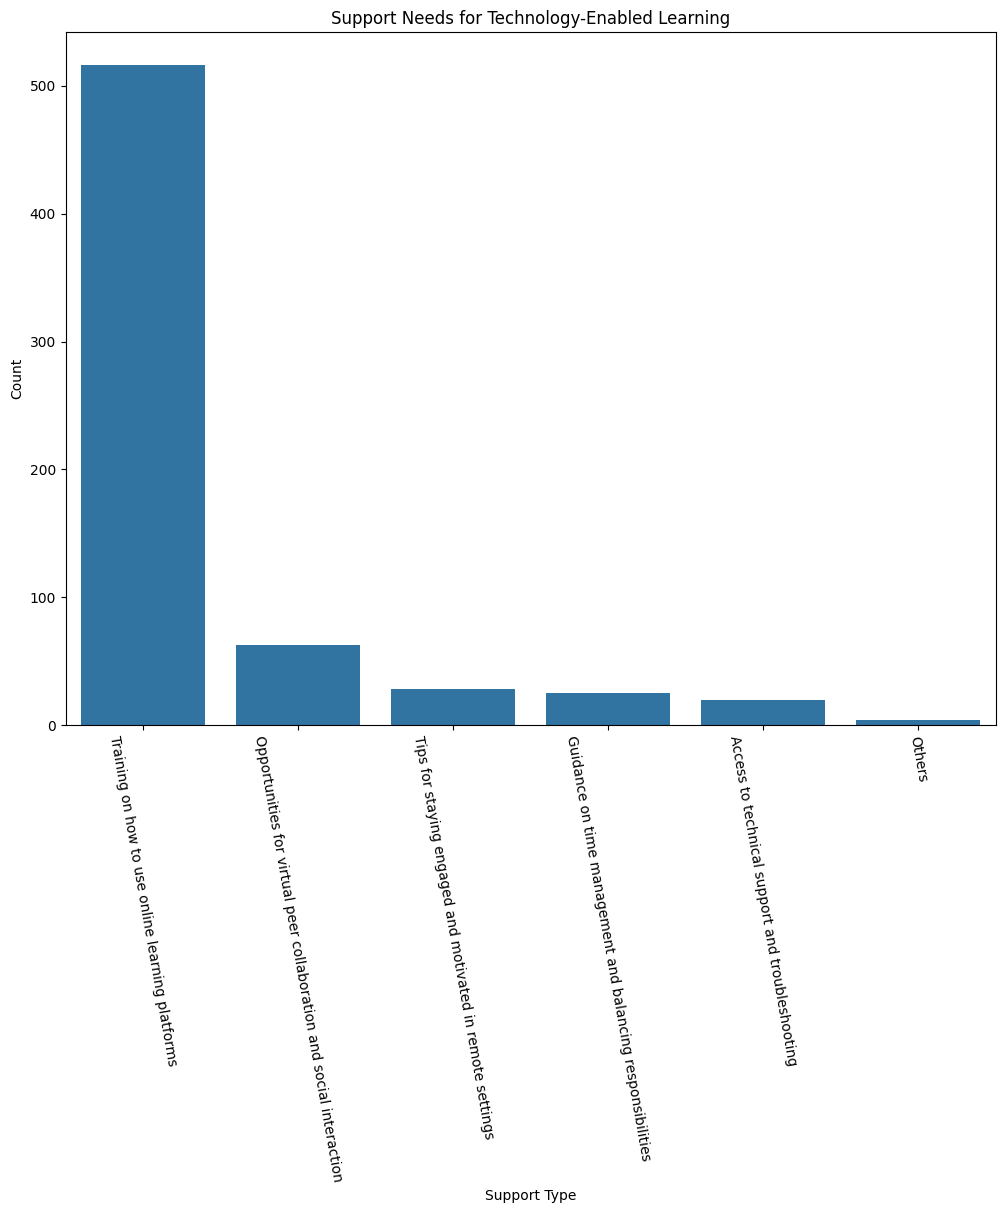

In [54]:

plt.figure(figsize = (12,9))
sns.barplot(data = support_needs)
plt.title("Support Needs for Technology-Enabled Learning")
plt.xlabel("Support Type")
plt.ylabel("Count")
plt.xticks(rotation=-80)
plt.savefig("tech_enabled.png")
plt.show()

In [48]:
df["What is your preferred learning style?"].unique()

array(['Visual (videos, diagrams)', 'Auditory (lectures, discussions)',
       'Kinesthetic (hands-on activities)'], dtype=object)

**Male Preferred Learning Styles:**
What is your preferred learning style?
Visual (videos, diagrams)            71
Auditory (lectures, discussions)     41
Kinesthetic (hands-on activities)    21
Name: count, dtype: int64

**Female Preferred Learning Styles:**
What is your preferred learning style?
Visual (videos, diagrams)            40
Auditory (lectures, discussions)     28
Kinesthetic (hands-on activities)    26
Name: count, dtype: int64


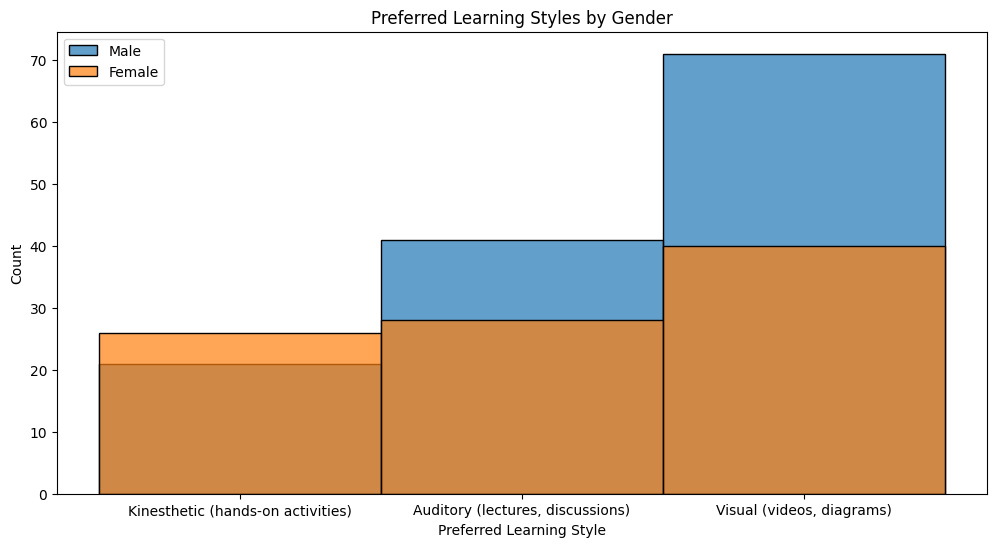

In [63]:
df_filtered = df[df['Have you used an online learning platform before?'] == 'Yes']

df_male = df_filtered[df_filtered['Gender'] == 'Male']
df_female = df_filtered[df_filtered['Gender'] == 'Female']

# Count preferred learning styles for males and females
male_counts = df_filtered[df_filtered['Gender'] == 'Male']['What is your preferred learning style?'].value_counts()
female_counts = df_filtered[df_filtered['Gender'] == 'Female']['What is your preferred learning style?'].value_counts()

# Print value counts for both genders
print("**Male Preferred Learning Styles:**")
print(male_counts)

print("\n**Female Preferred Learning Styles:**")
print(female_counts)

plt.figure(figsize=(12, 6))
sns.histplot(df_male['What is your preferred learning style?'], bins=20, alpha=0.7, label='Male')
sns.histplot(df_female['What is your preferred learning style?'], bins=20, alpha=0.7, label='Female')
plt.title("Preferred Learning Styles by Gender")
plt.xlabel("Preferred Learning Style")
plt.ylabel("Count")
plt.legend()
plt.savefig("learning_style.png")
plt.show()

In [50]:
df["Have you heard about the TeOSS project before?"].unique()

array(['No', 'Yes'], dtype=object)

Have you heard about the TeOSS project before?
No     503
Yes    153
Name: count, dtype: int64


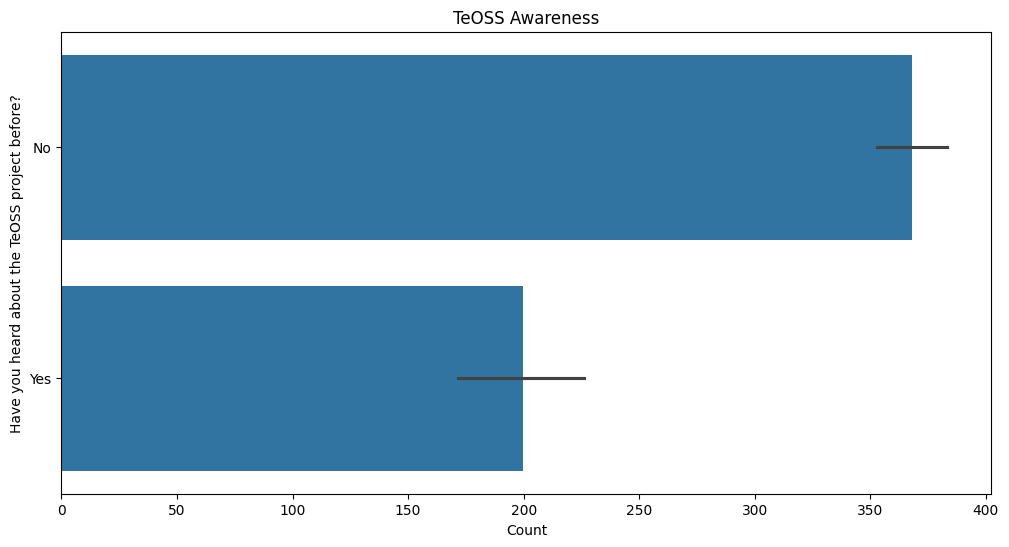

In [57]:
teoss_awareness = df["Have you heard about the TeOSS project before?"]
print(teoss_awareness.value_counts())

plt.figure(figsize = (12,6))
sns.barplot(data = teoss_awareness)
plt.title("TeOSS Awareness")
plt.xlabel("Count")
plt.ylabel("Have you heard about the TeOSS project before?")
plt.savefig("teoss_aware.png")
plt.show()